In [2]:
import sys
import os
import time
import numpy as np
import pandas as pd
import umap

os.environ['NOVA_HOME'] = '/home/projects/hornsteinlab/Collaboration/NOVA'
print('NOVA_HOME is at', os.getenv('NOVA_HOME'))
sys.path.insert(1, os.getenv('NOVA_HOME'))


from manuscript.plot_config import PlotConfig
from src.common.utils import load_config_file
from src.embeddings.embeddings_utils import load_embeddings
from src.figures.distances_plotting import *
from src.analysis.analyzer_distances_utils import summarize_times, merge_batches_by_key, correlate_columns

%load_ext autoreload
%autoreload 2

NOVA_HOME is at /home/projects/hornsteinlab/Collaboration/NOVA
NOVA_HOME: /home/projects/hornsteinlab/Collaboration/NOVA


In [3]:
dist_folder = '/home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen/figures/NIH/distances'

In [4]:
df = pd.read_csv(f'{dist_folder}/batch1_batch2_batch3_all_reps_WT_Untreated_without_CD41/distances_stats_euclidean.csv')
for col in ['label1','label2']:
    df[col] = df[col].str.split(pat='_', n=1).str[0]

In [5]:
cfg = PlotConfig()
color_mappings = cfg.COLOR_MAPPINGS_MARKERS  
# build label_map 
label_map = {k: v["alias"] for k, v in color_mappings.items()}

In [6]:
df['label1'] = df['label1'].map(label_map)
df['label2'] = df['label2'].map(label_map)

In [7]:
df.head()

,label1,label2,block_size,total_pairs,dist_time_s,stats_time_s,p50
0,ANXA11 granules,ANXA11 granules,6587,21690991,2.737078,0.118650,0.580312
1,ANXA11 granules,Coated vesicles,6587,46234153,0.013106,0.010263,0.855402
2,ANXA11 granules,ER,6587,49185129,0.015597,0.013384,0.781599
3,ANXA11 granules,Nucleus,6587,512797950,0.002252,0.143761,0.841414
4,ANXA11 granules,P-Bodies,6587,43368808,0.003891,0.019412,0.731718


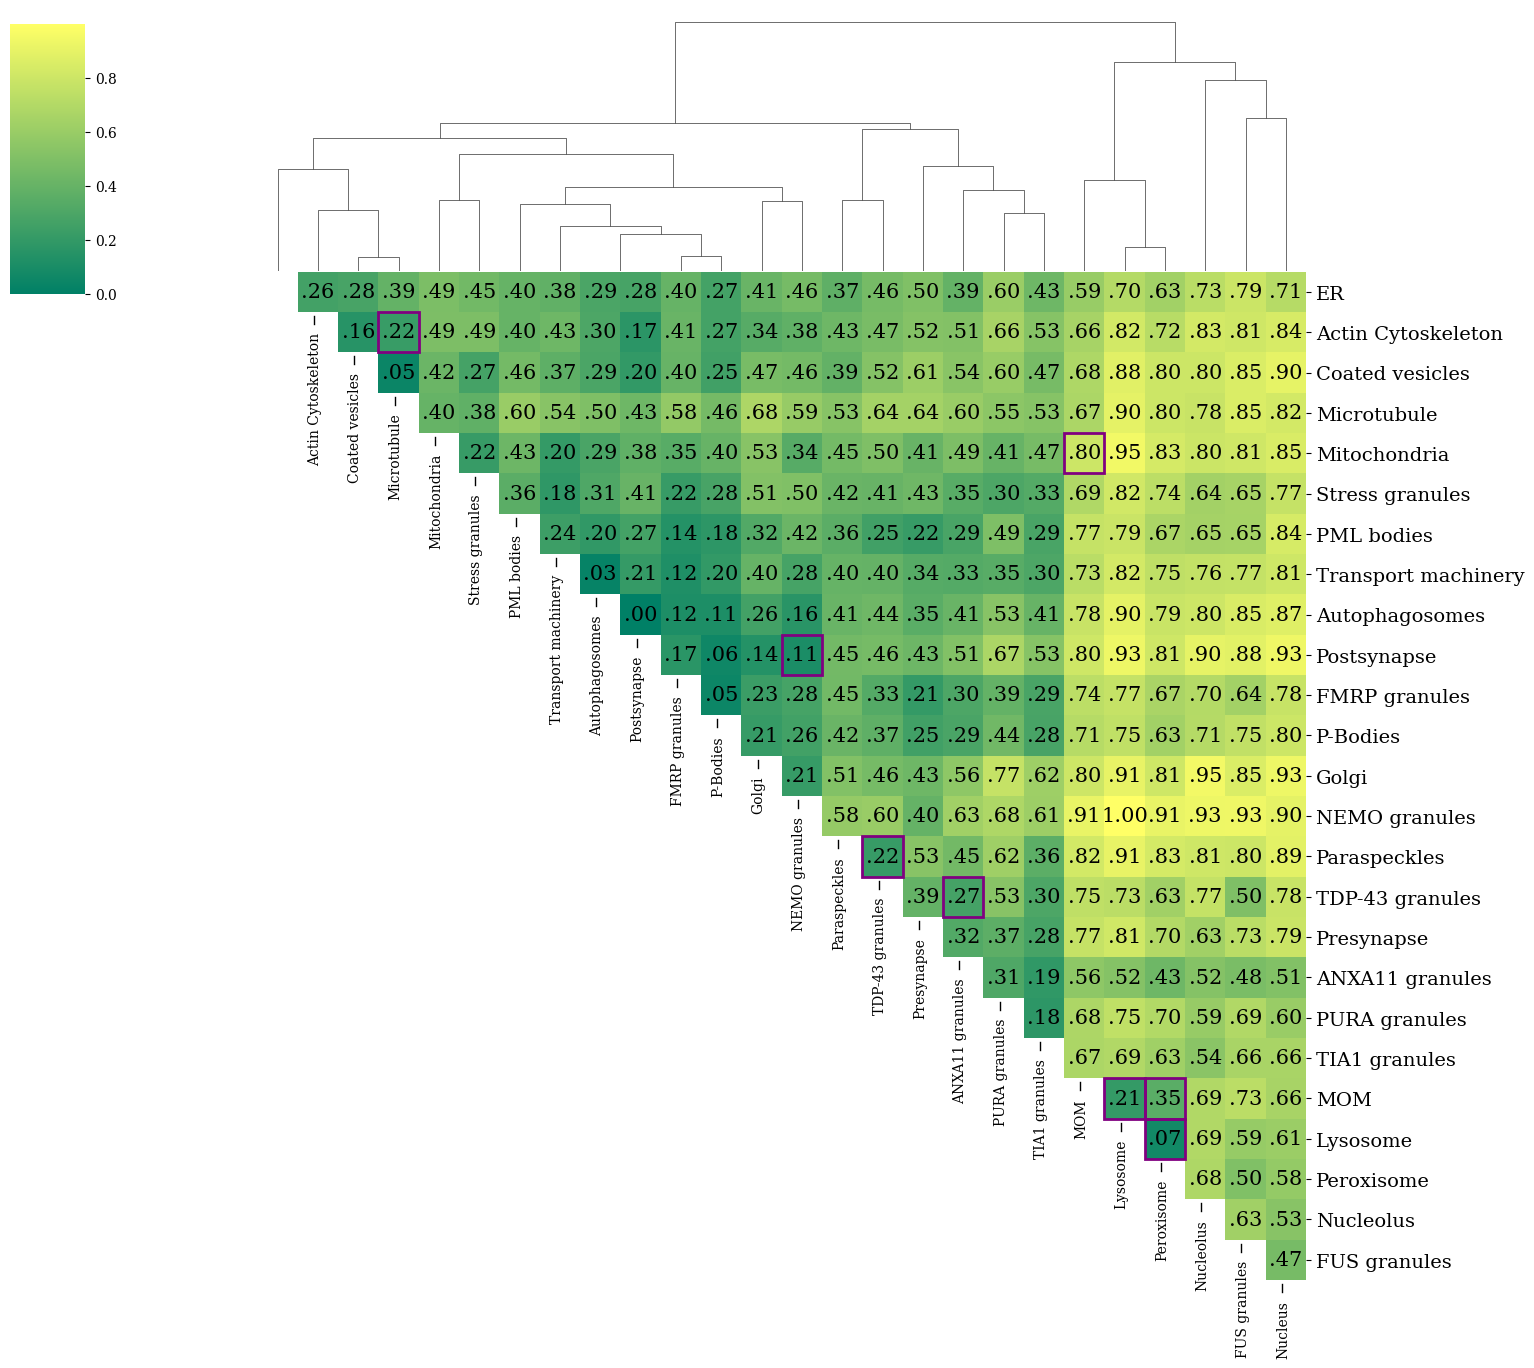

In [ ]:
plot_distances_heatmap(df, figsize=(15,15), normalize=True, remove_diagonal=True, show_upper_only=True, cmap='summer', fontsize=15,
highlight_organelles_pairs=[['MOM', 'Peroxisome'], ['MOM', 'Lysosome'], ['Peroxisome', 'Lysosome'], ['Actin Cytoskeleton', 'Microtubule'], ['Mitochondria', 'MOM'], ['NEMO granules', 'Postsynapse'], ['TDP-43 granules','Paraspeckles'], ['ANXA11 granules', 'TDP-43 granules']],savepath="/home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen/figures/NIH/distances/batch1_batch2_batch3_all_reps_WT_Untreated_without_CD41")# highlight_thresh=df2[df2.label1 == df2.label2]['p50'].max())

In [29]:
# median of all distances (before minmax)
df[df['label1'] == df['label2']].sort_values('p50', ascending=False)

,label1,label2,block_size,total_pairs,dist_time_s,stats_time_s,p50
296,PML bodies,PML bodies,5738,16459453,0.041211,0.018809,0.620926
330,Presynapse,Presynapse,6234,19428261,0.041101,0.019382,0.615209
273,Paraspeckles,Paraspeckles,6289,19772616,0.038955,0.021338,0.587319
51,ER,ER,7467,27874311,0.058813,0.021600,0.587021
141,FUS granules,FUS granules,7059,24911211,0.054240,0.008717,0.581270
341,TDP-43 granules,TDP-43 granules,6304,19867056,0.052352,0.018956,0.581245
0,ANXA11 granules,ANXA11 granules,6587,21690991,2.737078,0.118650,0.580312
345,TIA1 granules,TIA1 granules,6876,23636250,0.059727,0.021798,0.578375
323,Actin Cytoskeleton,Actin Cytoskeleton,6390,20412855,0.045667,0.021541,0.572797
315,PURA granules,PURA granules,6887,23711941,0.055382,0.022679,0.572318


In [7]:
metric_col = 'p50'

df_normalized = df.copy()

df_normalized.loc[df['label1'] == df_normalized['label2'], metric_col] = np.nan

df_normalized['p50_normalized'] = (df_normalized[metric_col] - df_normalized[metric_col].min()) / (
            (df_normalized[metric_col].max() - df_normalized[metric_col].min()) + 1e-6
        )

df_normalized

,label1,label2,block_size,total_pairs,dist_time_s,stats_time_s,p50,p50_normalized
0,ANXA11 granules,ANXA11 granules,6587,21690991,2.737078,0.118650,NaN,NaN
1,ANXA11 granules,Coated vesicles,6587,46234153,0.013106,0.010263,0.855402,0.539000
2,ANXA11 granules,ER,6587,49185129,0.015597,0.013384,0.781599,0.391121
3,ANXA11 granules,Nucleus,6587,512797950,0.002252,0.143761,0.841414,0.510973
4,ANXA11 granules,P-Bodies,6587,43368808,0.003891,0.019412,0.731718,0.291175
...,...,...,...,...,...,...,...,...
346,TIA1 granules,MOM,6876,45911052,0.000864,0.013485,0.922740,0.673925
347,TIA1 granules,Microtubule,6876,396064476,0.002515,0.115727,0.849223,0.526619
348,MOM,MOM,6677,22287826,0.044129,0.020521,NaN,NaN
349,MOM,Microtubule,6677,384601877,0.001875,0.114933,0.922058,0.672559


In [12]:
df_normalized[df_normalized['p50_normalized'] == df_normalized['p50_normalized'].max()]

,label1,label2,block_size,total_pairs,dist_time_s,stats_time_s,p50,p50_normalized
218,Lysosome,NEMO granules,7650,56701800,0.001349,0.029975,0.999999,0.999999


In [13]:
df_normalized[df_normalized['p50_normalized'] == df_normalized['p50_normalized'].min()]

,label1,label2,block_size,total_pairs,dist_time_s,stats_time_s,p50,p50_normalized
310,Postsynapse,Autophagosomes,5635,32621015,0.000798,0.009545,0.0,0.0


In [18]:
## find communties and islands
import numpy as np
import pandas as pd

# ---- 0) from edge list → symmetric square matrix ----
def to_square(df: pd.DataFrame,
              a: str = "label1",
              b: str = "label2",
              val: str = "p50_normalized") -> pd.DataFrame:
    labels = sorted(set(df[a]) | set(df[b]))
    M = pd.DataFrame(np.nan, index=labels, columns=labels)
    # fill both directions
    M.values[
        M.index.get_indexer(df[a]),
        M.columns.get_indexer(df[b])
    ] = df[val].to_numpy()
    M.values[
        M.index.get_indexer(df[b]),
        M.columns.get_indexer(df[a])
    ] = df[val].to_numpy()
    np.fill_diagonal(M.values, 0.0)
    return M

# ---- 1) tightest N-member community (greedy) ----
def tight_community(df_edges: pd.DataFrame, N: int,
                    a="label1", b="label2", val="p50_normalized"):
    D = to_square(df_edges, a, b, val)
    # start from the closest pair
    tri = D.where(np.triu(np.ones(D.shape, bool), 1)).stack()
    i0, j0 = tri.idxmin()
    comm = [i0, j0]
    while len(comm) < N:
        cand = [x for x in D.index if x not in comm]
        # add the candidate that minimizes the mean intra-distance
        def mean_intra(members):
            sub = D.loc[members, members].to_numpy()
            return sub[np.triu_indices(len(members), 1)].mean()
        next_member = min(cand, key=lambda c: mean_intra(comm + [c]))
        comm.append(next_member)
    score = D.loc[comm, comm].to_numpy()
    return comm, float(score[np.triu_indices(len(comm), 1)].mean())

# ---- 2) most isolated organelles (median distance to others) ----
def isolated_organeles(df_edges: pd.DataFrame, k=5,
                       a="label1", b="label2", val="p50_normalized",
                       how="median") -> pd.Series:
    D = to_square(df_edges, a, b, val)
    X = D.replace(0.0, np.nan)  # ignore diagonal
    if how == "median":
        s = X.median(axis=1, skipna=True)
    elif how == "mean":
        s = X.mean(axis=1, skipna=True)
    elif how == "q90":
        s = X.quantile(0.90, axis=1, numeric_only=True)
    else:
        raise ValueError("how ∈ {'median','mean','q90'}")
    return s.sort_values(ascending=False).head(k)

# ---------- usage ----------
# df has columns: 'label1', 'label2', 'p50_normalized' (one row per unordered pair)
# best 4-member community:
members, avg_d = tight_community(df_normalized, N=4)
print("4-member community:", members, "avg distance:", avg_d)

top_isolated = isolated_organeles(df_normalized, k=10, how='mean')
print("most isolated organelles:\n", top_isolated)



4-member community: ['Autophagosomes', 'Postsynapse', 'P-Bodies', 'FMRP granules'] avg distance: 0.08397428365606481
most isolated organelles:
 Nucleus          0.753854
Lysosome         0.741202
Nucleolus        0.723036
FUS granules     0.715455
MOM              0.689116
Peroxisome       0.666370
Microtubule      0.564619
NEMO granules    0.541494
PURA granules    0.538950
Paraspeckles     0.536575
dtype: float64


In [19]:
def get_dist_between(df, label1, label2):
    labels = [label1, label2]
    df_filtered = df[df['label1'].isin(labels) & df['label2'].isin(labels) & (df['label1'] != df['label2'])]
    
    assert len(df_filtered) == 1, f"Expected one distance value between {label1} and {label2}, but found {len(df_filtered)}"

    return df_filtered['p50_normalized'].values[0]


def get_dist_between_mean(df, labels):
    dists = []
    for i in range(len(labels)):
        label1 = labels[i]
        for j in range(i, len(labels)):
            label2 = labels[j]
            if label1 == label2:
                continue
            if i < j:
                dist = get_dist_between(df, label1, label2)
                dists.append(dist)
            print(label1, label2, dist)
    return np.mean(dists)

from itertools import product

def mean_external_distance_from_list(df: pd.DataFrame, labels: list[str]) -> float:
    """
    Mean distance from the set `labels` to all *other* labels in df.
    Reuses `get_dist_between(label1, label2)`.

    df must have columns: 'label1', 'label2', 'p50_normalized'.
    """
    # All unique labels present in the edge list
    all_labels = set(pd.Index(df['label1']).union(df['label2']))
    inside = set(labels)
    outside = list(all_labels - inside)

    if not inside or not outside:
        return np.nan  # nothing to compare against

    dists = []
    for a, b in product(inside, outside):
        try:
            d = get_dist_between(df, a, b)  # your existing helper
            print(f"{a} vs {b}: {d}")
            dists.append(d)
        except AssertionError:
            # If a pair is missing, skip it (or raise, if you prefer strict behavior)
            continue

    return float(np.mean(dists)) if dists else np.nan


In [ ]:
get_dist_between_mean(df_normalized, ['Autophagosomes', 'Postsynapse', 'P-Bodies', 'FMRP granules'])

Autophagosomes Postsynapse 0.0
Autophagosomes P-Bodies 0.11419463218779226
Postsynapse P-Bodies 0.060469111976039984


0.05822124805461074

In [23]:
get_dist_between_mean(df_normalized, ['FUS granules', 'Nucleolus', 'Paraspeckles', 'TDP-43 granules'])

FUS granules Nucleolus 0.6307872850767403
FUS granules Paraspeckles 0.8000520447624978
FUS granules TDP-43 granules 0.4992692840943011
Nucleolus Paraspeckles 0.807673316929699
Nucleolus TDP-43 granules 0.766134314281085
Paraspeckles TDP-43 granules 0.21856106466734276


0.6204128849686109

In [24]:
get_dist_between_mean(df_normalized, ['Paraspeckles', 'TDP-43 granules'])

Paraspeckles TDP-43 granules 0.21856106466734276


0.21856106466734276

In [25]:
get_dist_between_mean(df_normalized, ['ANXA11 granules', 'TDP-43 granules'])

ANXA11 granules TDP-43 granules 0.2708790546569573


0.2708790546569573

In [26]:
get_dist_between_mean(df_normalized, ['MOM', 'Peroxisome', 'Lysosome'])

MOM Peroxisome 0.35320728174461263
MOM Lysosome 0.20616751032805994
Peroxisome Lysosome 0.07335752134447986


0.2109107711390508

In [20]:
mean_external_distance_from_list(df_normalized, ['MOM', 'Peroxisome', 'Lysosome'])

Peroxisome vs Coated vesicles: 0.7973024200860088
Peroxisome vs Postsynapse: 0.8067230166408218
Peroxisome vs Mitochondria: 0.8332718294241042
Peroxisome vs NEMO granules: 0.9115361105233317
Peroxisome vs ANXA11 granules: 0.4314209247487687
Peroxisome vs TIA1 granules: 0.6259248336551805
Peroxisome vs Transport machinery: 0.7481946942367766
Peroxisome vs FUS granules: 0.5014086241816029
Peroxisome vs TDP-43 granules: 0.63164478866781
Peroxisome vs PURA granules: 0.6981279497473932
Peroxisome vs Stress granules: 0.7368929641077385
Peroxisome vs ER: 0.6349593147350734
Peroxisome vs P-Bodies: 0.6348370189582969
Peroxisome vs Nucleus: 0.578324307711143
Peroxisome vs Nucleolus: 0.682714024124246
Peroxisome vs Presynapse: 0.701426830554151
Peroxisome vs Golgi: 0.8052116367041946
Peroxisome vs PML bodies: 0.668533804921119
Peroxisome vs Microtubule: 0.7971063168970762
Peroxisome vs Autophagosomes: 0.7864294417525053
Peroxisome vs Paraspeckles: 0.8310542630342744
Peroxisome vs Actin Cytoskelet

0.7413296044680929

In [12]:

pairs = [['MOM', 'Microtubule'], ['Peroxisome', 'Microtubule'], ['Lysosome', 'Microtubule'], ['MOM', 'Actin Cytoskeleton'], ['Peroxisome', 'Actin Cytoskeleton'], ['Lysosome', 'Actin Cytoskeleton']]
dists = []
for pair in pairs:
    dist = get_dist_between(df_normalized, pair[0], pair[1])
    print(pair, dist)
    dists.append(dist)

np.mean(dists)

['MOM', 'Microtubule'] 0.6725589363319571
['Peroxisome', 'Microtubule'] 0.7971063168970762
['Lysosome', 'Microtubule'] 0.8959758838000368
['MOM', 'Actin Cytoskeleton'] 0.6550999004729501
['Peroxisome', 'Actin Cytoskeleton'] 0.7225855525195858
['Lysosome', 'Actin Cytoskeleton'] 0.8214859322256797


0.7608020870412142

In [13]:
get_dist_between_mean(df_normalized, ['Microtubule', 'Actin Cytoskeleton'])

Microtubule Actin Cytoskeleton 0.21936697472758462


0.21936697472758462

In [14]:
get_dist_between_mean(df_normalized, ['MOM', 'Mitochondria'])

MOM Mitochondria 0.7969923811831652


0.7969923811831652

In [36]:
get_dist_between_mean(df_normalized, ['NEMO granules', 'Postsynapse'])

NEMO granules Postsynapse 0.10766423360808106


0.10766423360808106